<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Lab_4_Paper_Helicopter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab_1_Helicopter_SQC.csv to Lab_1_Helicopter_SQC.csv
User uploaded file "Lab_1_Helicopter_SQC.csv" with length 404 bytes


In [35]:
import pandas as pd

data = pd.read_csv('Lab_1_Helicopter_SQC.csv',sep = ',', na_values = ".")
data

,A,B,C,Times,Run Order
0,-1,-1,-1,2.36,1
1,1,-1,-1,1.11,4
2,-1,1,-1,2.76,7
3,1,1,-1,2.26,10
4,-1,-1,1,2.06,13
5,1,-1,1,1.30,16
6,-1,1,1,2.30,19
7,1,1,1,1.40,22
8,-1,-1,-1,2.21,2
9,1,-1,-1,1.58,5


In [37]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          24 non-null     int64  
 1   B          24 non-null     int64  
 2   C          24 non-null     int64  
 3   Times      24 non-null     float64
 4   Run Order  24 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


In [38]:
X=df[['A', 'B', 'C']]
X

,A,B,C
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1
8,-1,-1,-1
9,1,-1,-1


In [39]:
xx=X.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'A', 'B', 'C','AB', 'AC', 'BC', 'ABC']) #if interaction_only=False, then 1, x1, x2, x1^2, x1x2, x2^2
xxpd

,I,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [40]:
X=xxpd[['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']]
X

,A,B,C,AB,AC,BC,ABC
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [41]:
Y=df[['Times']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[2.19      ],
       [1.44333333],
       [2.93      ],
       [2.14666667],
       [2.13666667],
       [1.24666667],
       [2.57      ],
       [1.35      ],
       [2.19      ],
       [1.44333333],
       [2.93      ],
       [2.14666667],
       [2.13666667],
       [1.24666667],
       [2.57      ],
       [1.35      ],
       [2.19      ],
       [1.44333333],
       [2.93      ],
       [2.14666667],
       [2.13666667],
       [1.24666667],
       [2.57      ],
       [1.35      ]])

In [42]:
X = sm.add_constant(X)
X

,const,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [43]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     8.170
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           0.000270
Time:                        04:39:25   Log-Likelihood:                -5.1239
No. Observations:                  24   AIC:                             26.25
Df Residuals:                      16   BIC:                             35.67
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0017      0.075     26.728      0.0

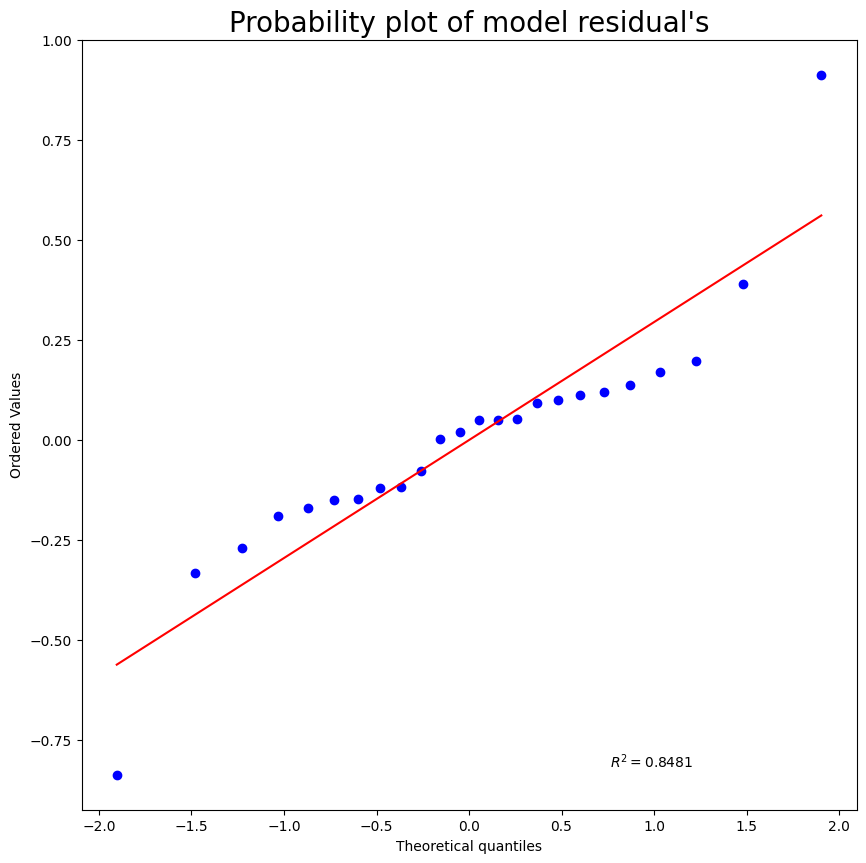

In [44]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()